In [1]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')
from scipy import linalg
np.set_printoptions(suppress=True)

# Students may (probably should) ignore this code. It is just here to make pretty arrows.

def plot_vectors(vs):
    """Plot vectors in vs assuming origin at (0,0)."""
    n = len(vs)
    X, Y = np.zeros((n, 2))
    U, V = np.vstack(vs).T
    plt.quiver(X, Y, U, V, range(n), angles='xy', scale_units='xy', scale=1)
    xmin, xmax = np.min([U, X]), np.max([U, X])
    ymin, ymax = np.min([V, Y]), np.max([V, Y])
    xrng = xmax - xmin
    yrng = ymax - ymin
    xmin -= 0.05*xrng
    xmax += 0.05*xrng
    ymin -= 0.05*yrng
    ymax += 0.05*yrng
    plt.axis([xmin, xmax, ymin, ymax])

# Vector Spaces

### Coordinates

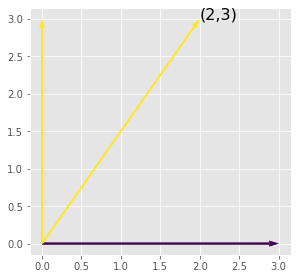

In [2]:
# Again, this code is not intended as a coding example.

a1 = np.array([3,0])         # axis
a2 = np.array([0,3])

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_vectors([a1, a2])
v1 = np.array([2,3])
plot_vectors([a1,v1])
plt.text(2,3,"(2,3)",fontsize=16)
plt.tight_layout()

# Matrices and Linear Transformations

### Matrices, Transformations and Geometric Interpretation

5


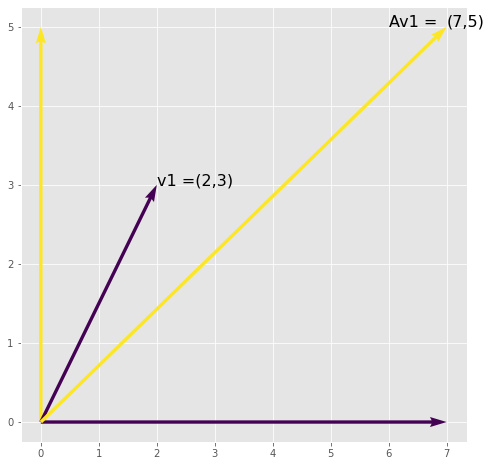

In [3]:
a1 = np.array([7,0])         # axis
a2 = np.array([0,5])

A = np.array([[2,1],[1,1]])  # transformation f in standard basis
v2 =np.dot(A,v1)
plt.figure(figsize=(8,8))
plot_vectors([a1, a2])
v1 = np.array([2,3])
plot_vectors([v1,v2])
plt.text(2,3,"v1 =(2,3)",fontsize=16)
plt.text(6,5,"Av1 = ", fontsize=16)
plt.text(v2[0],v2[1],"(7,5)",fontsize=16)
print(v2[1])

### Example - Change to a Different Basis

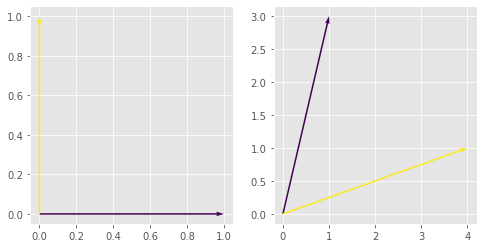

In [4]:
e1 = np.array([1,0])
e2 = np.array([0,1])
B = np.array([[1,4],[3,1]])
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_vectors([e1, e2])
plt.subplot(1,2,2)
plot_vectors([B.dot(e1), B.dot(e2)])
plt.Circle((0,0),2)
#plt.show()
#plt.tight_layout()

In [5]:
A = np.array([[2,1],[3,1]])  # transformation f in standard basis
e1 = np.array([1,0])         # standard basis vectors e1,e2
e2 = np.array([0,1])

print(A.dot(e1))             # demonstrate that Ae1 is (2,3)
print(A.dot(e2))             # demonstrate that Ae2 is (1,1)

# new basis vectors
v1 = np.array([1,3])
v2 = np.array([4,1])

# How v1 and v2 are transformed by A
print("Av1: ")
print(A.dot(v1))
print("Av2: ")
print(A.dot(v2))

# Change of basis from standard to v1,v2
B = np.array([[1,4],[3,1]])
print(B)
B_inv = linalg.inv(B)

print("B B_inv ")
print(B.dot(B_inv))   # check inverse

# Matrix of the transformation with respect to the new basis
T = B.dot(A.dot(B_inv))        # B A B^{-1}

print(T)

print(B_inv)
np.dot(B_inv,(T.dot(e1)))

[2 3]
[1 1]
Av1: 
[5 6]
Av2: 
[ 9 13]
[[1 4]
 [3 1]]
B B_inv 
[[ 1. -0.]
 [ 0.  1.]]
[[0.0909 4.6364]
 [0.2727 2.9091]]
[[-0.0909  0.3636]
 [ 0.2727 -0.0909]]


array([0.0909, 0.    ])

# More Properties of Vectors, Vector Spaces and Matrices

### Norms and Distance of Vectors

In [6]:
# norm of a vector
# Note: The numpy linalg package is imported at the top of this notebook


v = np.array([1,2])
linalg.norm(v)

2.23606797749979

In [7]:
# distance between two vectors

w = np.array([1,1])
linalg.norm(v-w)

1.0

# Inner Products

<function matplotlib.patches.Patch.draw(self, renderer)>

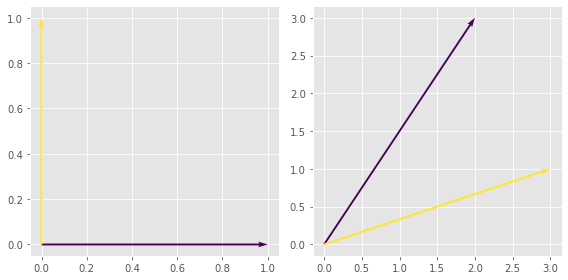

In [8]:
e1 = np.array([1,0])
e2 = np.array([0,1])
A = np.array([[2,3],[3,1]])
v1=A.dot(e1)
v2=A.dot(e2)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_vectors([e1, e2])
plt.subplot(1,2,2)
plot_vectors([v1,v2])
plt.tight_layout()
#help(plt.Circle)
plt.Circle(np.array([0,0]),radius=1)
plt.Circle.draw

### Outer Products

In [9]:
np.outer(v,w)

array([[1, 1],
       [2, 2]])

In [10]:
# We have n observations of p variables
n, p = 10, 4
v = np.random.random((p,n))

In [11]:
# The covariance matrix is a p by p matrix
np.cov(v)

array([[ 0.1281, -0.0188, -0.0519,  0.0029],
       [-0.0188,  0.0917, -0.0259, -0.0119],
       [-0.0519, -0.0259,  0.1065,  0.0272],
       [ 0.0029, -0.0119,  0.0272,  0.051 ]])

In [12]:
# From the definition, the covariance matrix
# is just the outer product of the normalized
# matrix where every variable has zero mean
# divided by the number of degrees of freedom
w = v - v.mean(1)[:, np.newaxis]
w.dot(w.T)/(n - 1)

array([[ 0.1281, -0.0188, -0.0519,  0.0029],
       [-0.0188,  0.0917, -0.0259, -0.0119],
       [-0.0519, -0.0259,  0.1065,  0.0272],
       [ 0.0029, -0.0119,  0.0272,  0.051 ]])

### Trace and Determinant of Matrices

In [13]:
n = 6
M = np.random.randint(100,size=(n,n))
print(M)
np.linalg.det(M)

[[ 1 44 75 92 37  8]
 [93 26 22 26 31 51]
 [61 10 74  2 35 71]
 [51 87 20 80 42 77]
 [80 35 67 86  5 13]
 [67 57 19 16 39 55]]


52226663224.00007

# Exercises

1. Determine whether the following system of equations has no solution, infinite solutions or a unique solution without solving the system
                          x+2y−z+w = 2

                          3x−4y+2w = 3

                          2y+z = 4

                          2x+2y−3z+2w = 0

                          −2x+6y−z−w = −1

In [14]:
A = np.array([[1,2,-1,1,2],[3,-4,0,2,3],[0,2,1,0,4],[2,2,-3,2,0],[-2,6,-1,-1,-1]])

np.linalg.matrix_rank(A)
np.linalg.det(A)

0.0

In [15]:
# det(A)=0 且 det(A|B)=0  -->無限多組解

2. Let f(x) be a linear transformation of ℝ3 such that

                         f(e1) = (1,1,3)

                         f(e2) = (1,0,4)

                         f(e3) = (0,2,1)

* Find a matrix representation for f.

* Compute the matrix representation for f in the basis

                         v1 = (2,3,3)
 
                         v2 = (8,5,2)
 
                         v3 = (1,0,5)

In [16]:
F = np.array([[1,1,0],[1,0,2],[3,4,1]])
print(F)

[[1 1 0]
 [1 0 2]
 [3 4 1]]


In [17]:
e1 = np.array([1,0,0])
v1 = np.array([2,3,3])
v2 = np.array([8,5,2])
v3 = np.array([1,0,5])

B = np.array([[2,8,1],[3,5,0],[3,2,5]])
B_inv = linalg.inv(B)

T = B.dot(F.dot(B_inv))

print(T)

[[-1.038   1.4177  3.6076]
 [-0.8228  1.0506  2.1646]
 [-0.9367  5.3038  1.9873]]
